<a href="https://colab.research.google.com/github/Mjcherono/Predicting-Disease-Spread/blob/main/dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DengAI: Predicting Disease Spread(Dengue)



### Problem Description
In cities where dengue is present, the disease is endemic. Globally, researchers estimate that dengue infects 390 million people per year ; however, only 50–100 million cases are detected due to the high asymptomatic rate . Estimating dengue burden can be problematic due to delays in case identification, strong intra- and inter-annual variation in incidence, and the majority of cases being clinically mild or asymptomatic . As a result, implementing effective vector control operations can be challenging. To overcome these issues, the development of accurate and timely early warnings systems capable of predicting future dengue incidence needs to be done.


### Determining Success Metrics.
For this project to be termed successful, if any of the models built achieve an accuracy of above 80% in prediction of total dengue cases.


### Experimental Design
*   Importing Libraries.
*   Loading dataset.
*   Data Cleaning and Preprocessing.
*   Exploratory data analysis.
*   Model Implementation.
*   Acccuracy check.





##### Libraries

In [1234]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

##### Loading data.

In [1235]:
#train

train=pd.read_csv("/content/dengue_features_train (1).csv")

In [1236]:
#preview of the head

train.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [1237]:
#shape

train.shape

(1456, 24)

In [1238]:
#Test data

test=pd.read_csv("/content/dengue_features_test (1).csv")

In [1239]:
# preview of head

test.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [1240]:
#shape

test.shape

(416, 24)

In [1241]:
#labels

labels=pd.read_csv("/content/dengue_labels_train.csv")

In [1242]:
labels.head(5)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [1243]:
labels.shape

(1456, 4)

###### Merging datasets


In [1244]:
trainmerge=train.merge(labels,on=["city","year","weekofyear"],how="right")
trainmerge.shape


(1456, 25)

In [1245]:
trainmerge.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,301.3,297.7,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,300.6,298.4,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,302.1,297.7,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,302.3,298.7,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


Description of Dataset.


In [1246]:
trainmerge.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [1247]:
#summary of the combined set

trainmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

the merged dataset has 1456 observations and 25 columns,2 objects, 3 integer values and 20 float columns.

In [1248]:
#Checking on target variable

trainmerge.total_cases.value_counts()

0      100
6       71
3       70
5       70
2       69
      ... 
135      1
137      1
141      1
142      1
461      1
Name: total_cases, Length: 135, dtype: int64

Changing week start date to date time.

In [1249]:
trainmerge.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [1250]:
trainmerge['week_start_date']=pd.to_datetime(trainmerge['week_start_date'],
                                             format='%Y/%m/%d')
trainmerge.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1456 non-null   object        
 1   year                                   1456 non-null   int64         
 2   weekofyear                             1456 non-null   int64         
 3   week_start_date                        1456 non-null   datetime64[ns]
 4   ndvi_ne                                1262 non-null   float64       
 5   ndvi_nw                                1404 non-null   float64       
 6   ndvi_se                                1434 non-null   float64       
 7   ndvi_sw                                1434 non-null   float64       
 8   precipitation_amt_mm                   1443 non-null   float64       
 9   reanalysis_air_temp_k                  1446 non-null   float64 

###### Separating entries based on cities.

In [1251]:
# create new datasets
sj = trainmerge[trainmerge['city'] == 'sj']
iq = trainmerge[trainmerge['city'] == 'iq']

In [1252]:
sj.shape

(936, 25)

In [1253]:
iq.shape

(520, 25)

###### Checking for null values

In [1254]:
#San Juan data
sj.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_mi

In [1255]:
#Geting the percentage of missing data

sj.isnull().sum()/len(sj)*100

city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
week_start_date                           0.000000
ndvi_ne                                  20.405983
ndvi_nw                                   5.235043
ndvi_se                                   2.029915
ndvi_sw                                   2.029915
precipitation_amt_mm                      0.961538
reanalysis_air_temp_k                     0.641026
reanalysis_avg_temp_k                     0.641026
reanalysis_dew_point_temp_k               0.641026
reanalysis_max_air_temp_k                 0.641026
reanalysis_min_air_temp_k                 0.641026
reanalysis_precip_amt_kg_per_m2           0.641026
reanalysis_relative_humidity_percent      0.641026
reanalysis_sat_precip_amt_mm              0.961538
reanalysis_specific_humidity_g_per_kg     0.641026
reanalysis_tdtr_k                         0.641026
station_avg_temp_c             

We wont drop any columns since it's within the threshhold.

###### Imputing missing data


In [1256]:
#Imputing using forward fill.

sj.fillna(method='pad',inplace=True)
sj.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [1257]:
#Iquitos data

iq.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c              

In [1258]:
#checking on percentages 
iq.isnull().sum()/len(iq)*100

city                                     0.000000
year                                     0.000000
weekofyear                               0.000000
week_start_date                          0.000000
ndvi_ne                                  0.576923
ndvi_nw                                  0.576923
ndvi_se                                  0.576923
ndvi_sw                                  0.576923
precipitation_amt_mm                     0.769231
reanalysis_air_temp_k                    0.769231
reanalysis_avg_temp_k                    0.769231
reanalysis_dew_point_temp_k              0.769231
reanalysis_max_air_temp_k                0.769231
reanalysis_min_air_temp_k                0.769231
reanalysis_precip_amt_kg_per_m2          0.769231
reanalysis_relative_humidity_percent     0.769231
reanalysis_sat_precip_amt_mm             0.769231
reanalysis_specific_humidity_g_per_kg    0.769231
reanalysis_tdtr_k                        0.769231
station_avg_temp_c                       7.115385


Equally no dropping of columns they are all below 20%

Filling missing values in Iquitos data.

In [1259]:
#Imputed for missing values using forward fill method.

iq.fillna(method='pad', inplace=True)
iq.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

###### Duplicated Values


In [1260]:
#duplicated on Iquitos

iq.duplicated().sum()

0

In [1261]:
#duplicated on san juan

sj.duplicated().sum()

0

In [1262]:
sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


###### Outliers

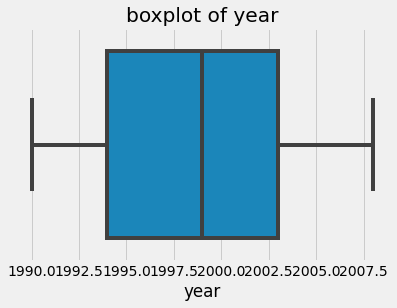

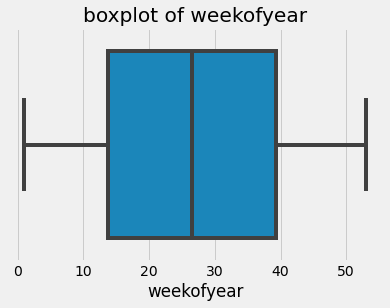

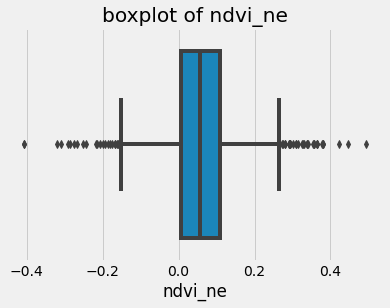

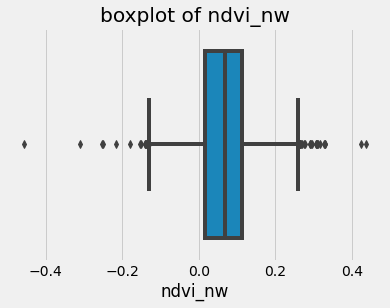

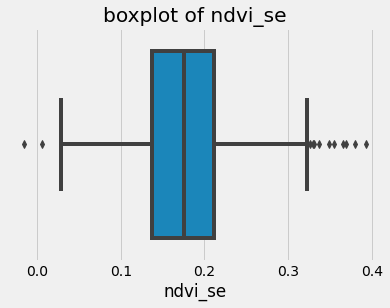

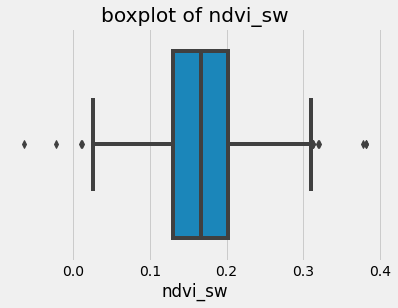

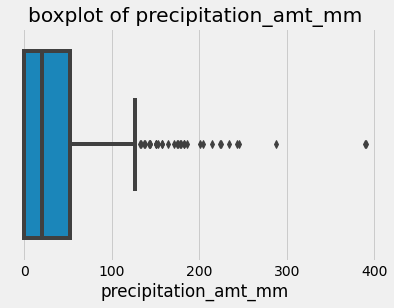

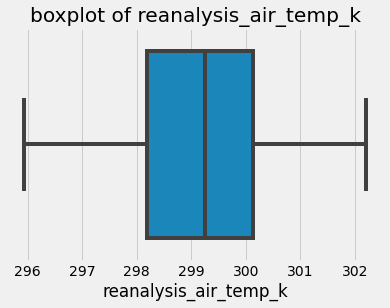

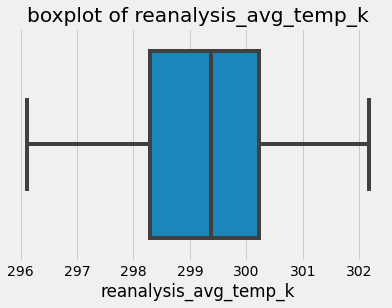

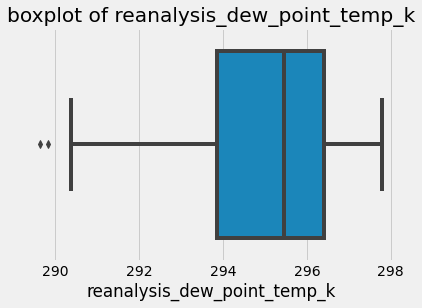

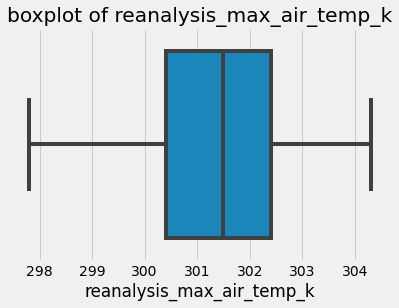

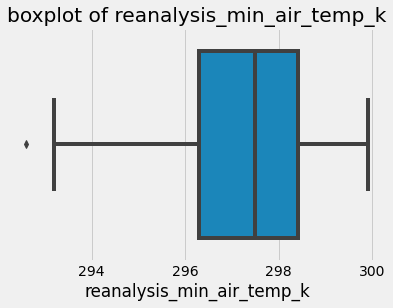

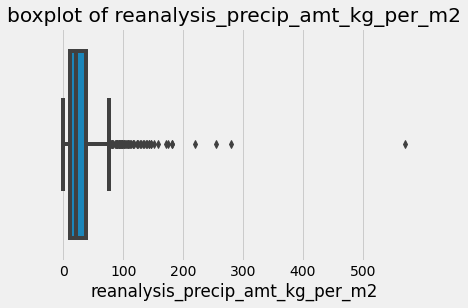

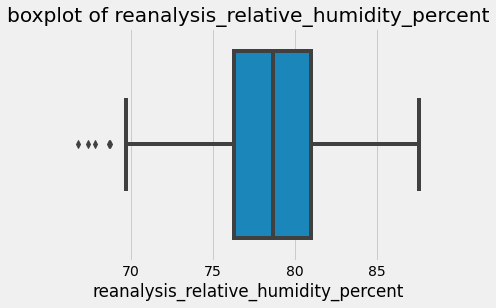

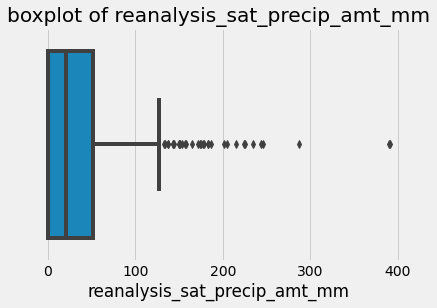

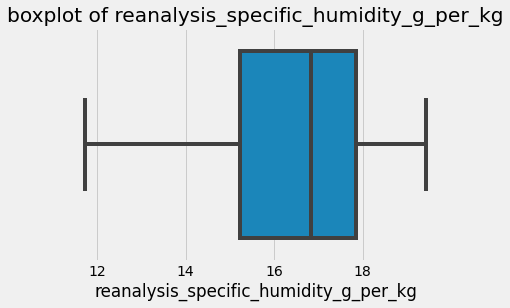

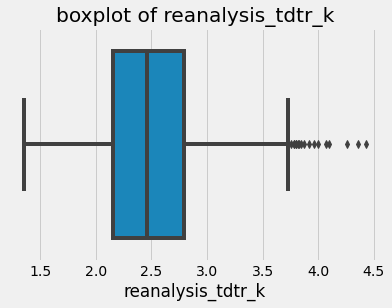

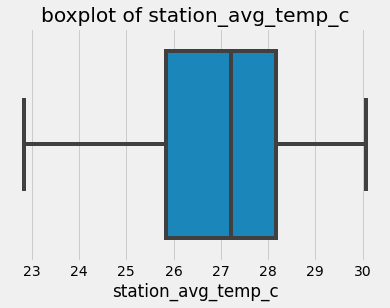

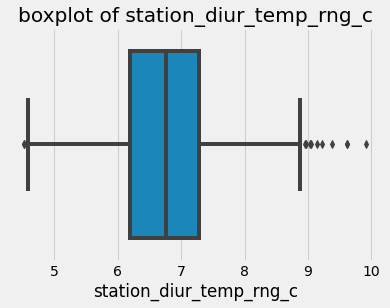

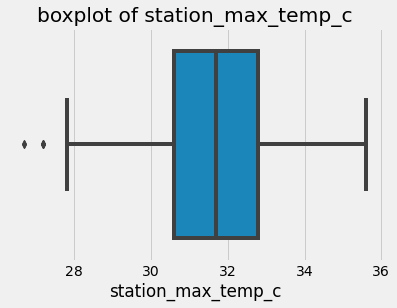

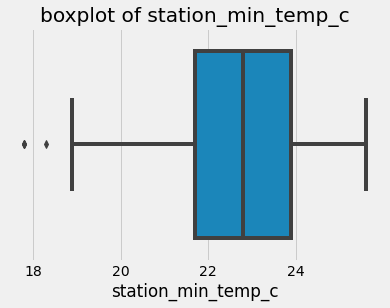

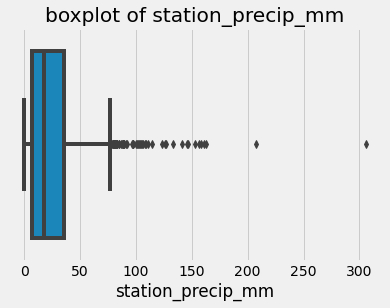

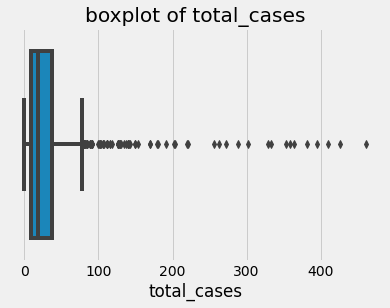

In [1263]:
#Numeric features
sj_num = sj.drop(['city','week_start_date'],axis=1)

colnames = list(sj_num.columns)
for i in colnames:
    plt.title(f'boxplot of {i}')
    sns.boxplot(sj_num[i])
    plt.show()



*   The outliers on NDVI columns won't be gotten rid of since they indicate areas with extreme cases in terms of vegetation cover. That at 0 and below corresponds to barren areas of rock or sand/ snow .Moderate values where the interquatile range is at represents shrubs and grasslands while high values represent temperature and tropical rainforests.
*   List item



Description of data


In [1264]:
print(sj.describe())
print(iq.describe())

              year  weekofyear  ...  station_precip_mm  total_cases
count   936.000000  936.000000  ...         936.000000   936.000000
mean   1998.826923   26.503205  ...          26.756838    34.180556
std       5.212076   15.021909  ...          29.264050    51.381372
min    1990.000000    1.000000  ...           0.000000     0.000000
25%    1994.000000   13.750000  ...           6.875000     9.000000
50%    1999.000000   26.500000  ...          17.650000    19.000000
75%    2003.000000   39.250000  ...          35.350000    37.000000
max    2008.000000   53.000000  ...         305.900000   461.000000

[8 rows x 23 columns]
              year  weekofyear  ...  station_precip_mm  total_cases
count   520.000000  520.000000  ...         520.000000   520.000000
mean   2005.000000   26.503846  ...          61.581346     7.565385
std       2.918283   15.029450  ...          62.968520    10.765478
min    2000.000000    1.000000  ...           0.000000     0.000000
25%    2002.750000   13.7

### Exploratory Data Analysis.

#### Univariate Analysis.
San Juan,Puerto Rico.

In [1265]:
# Getting min and max value of week start dates
sj['week_start_date'].min(),sj['week_start_date'].max()

(Timestamp('1990-04-30 00:00:00'), Timestamp('2008-04-22 00:00:00'))

0
461


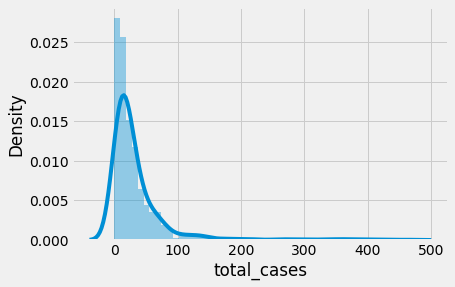

In [1266]:
# getting min value of total cases
print(sj['total_cases'].min())

# getting max value of total cases
print(sj['total_cases'].max())

#Plotting the distribution of total cases
sns.distplot(sj.total_cases)
plt.show()

Most entries done for total cases were at 0 to 50 and those at a 100and above 100 are less.

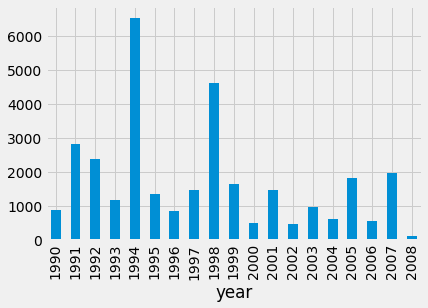

In [1267]:
sj.groupby(['year']).total_cases.sum().plot(kind='bar')

Most cases were in the year 1994 and the least cases in 2008

In [1268]:
# Checking on  min value of weekof year
print(sj['weekofyear'].min())

1


In [1269]:
# checking  min and max value of week start dates 
sj['weekofyear'].max()

53

In [1270]:
sj['ndvi_nw'].min()

-0.4561

Negative values of NDVI (values approaching -1) correspond to water. Valu`es close to zero (-0.1 to 0.1) generally correspond to barren areas of rock, sand, or snow. Lastly, low, positive values represent shrub and grassland (approximately 0.2 to 0.4), while high values indicate temperate and tropical rainforests (values approaching 1).

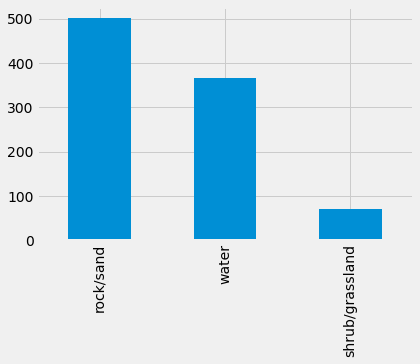

In [1271]:
#Vegetation 
#getting total vegetation
sj['ndvi_all_directions']=(sj['ndvi_ne']+sj['ndvi_nw']+sj['ndvi_se']+sj['ndvi_sw'])/4

# 
def get_ndvi_category(x):
    x=float(x)
    if x < 0.1: return 'water'
    if x >= 0.1 and x <0.2: return 'rock/sand'
    if x >=0.2 and x<0.5 : return 'shrub/grassland'
    if x > 0.6: return 'forest'
    return "other"

sj['ndvi_desc'] = sj.ndvi_all_directions.apply(get_ndvi_category)  

#calculating the value counts for type of vegetation.
sj['ndvi_desc'].value_counts().plot(kind='bar')

Most parts of this city are rocky and the rest is mostly water and a small part has shrubs.This was an expectation since San Juan is an Island in the carribean.

**Iquitos**.

In [1272]:
iq.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

Total Cases

0
116


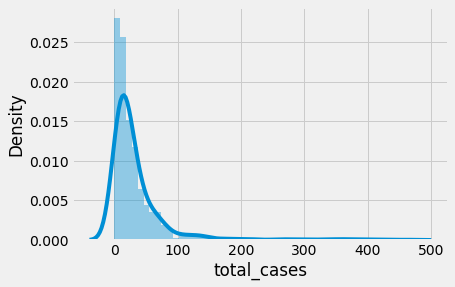

In [1273]:
# getting min and max value of total cases
print(iq['total_cases'].min())

# max value of total cases
print(iq['total_cases'].max())

#Plotting the distribution of total cases
sns.distplot(sj.total_cases)
plt.show()

Same as Iquitos, most entries are below 50 and reduces towards 100, above 100 are rare.

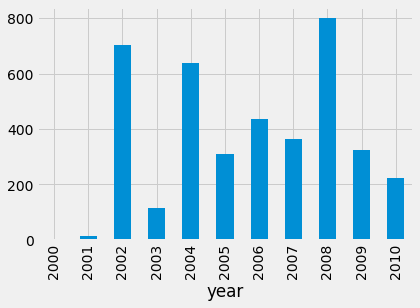

In [1274]:
iq.groupby(['year']).total_cases.sum().plot(kind='bar')

The year that recorded the highest cases was 2008, though 2002 and 2004 had relatively high number of cases.

The least affected with  zero cases year was 2000

Weeks of year.

In [1275]:
iq['weekofyear'].max()

53

In [1276]:
iq['weekofyear'].unique()

array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       52, 53])

Vegetation

In [1277]:
iq['ndvi_ne'].min()

0.06172857

Negative values of NDVI (values approaching -1) correspond to water. Valu`es close to zero (-0.1 to 0.1) generally correspond to barren areas of rock, sand, or snow. Lastly, low, positive values represent shrub and grassland (approximately 0.2 to 0.4), while high values indicate temperate and tropical rainforests (values approaching 1).

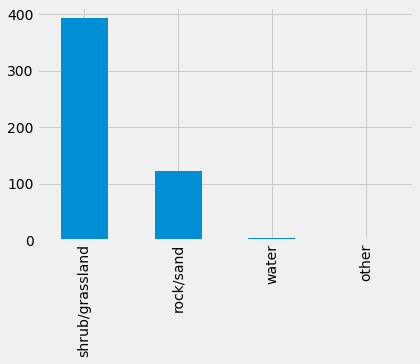

In [1278]:
# getting total vegetation
iq['ndvi_all_directions']=(iq['ndvi_ne']+iq['ndvi_nw']+iq['ndvi_se']+iq['ndvi_sw'])/4

# categorizing vegetation into different specific types
def get_ndvi_category(x):
    x=float(x)
    if x < 0.1: return 'water'
    if x >= 0.1 and x <0.2: return 'rock/sand'
    if x >=0.2 and x<0.5 : return 'shrub/grassland'
    if x > 0.6: return 'forest'
    return "other"
iq['ndvi_desc'] =iq.ndvi_all_directions.apply(get_ndvi_category)

# calculating frequency of thetype ofvegetation
iq['ndvi_desc'].value_counts().plot(kind='bar')

Most areas in iquitos are shrub/grassland.
observations
The worst year insan juan was 1994 while in iquitos it was 2008
In san juan the year with least cases was 2008 while iquitos peru the year2000 had zero cases
san juan is mostly rocky while iquitos is shrub/grassland.


#### Bivariate Analysis.

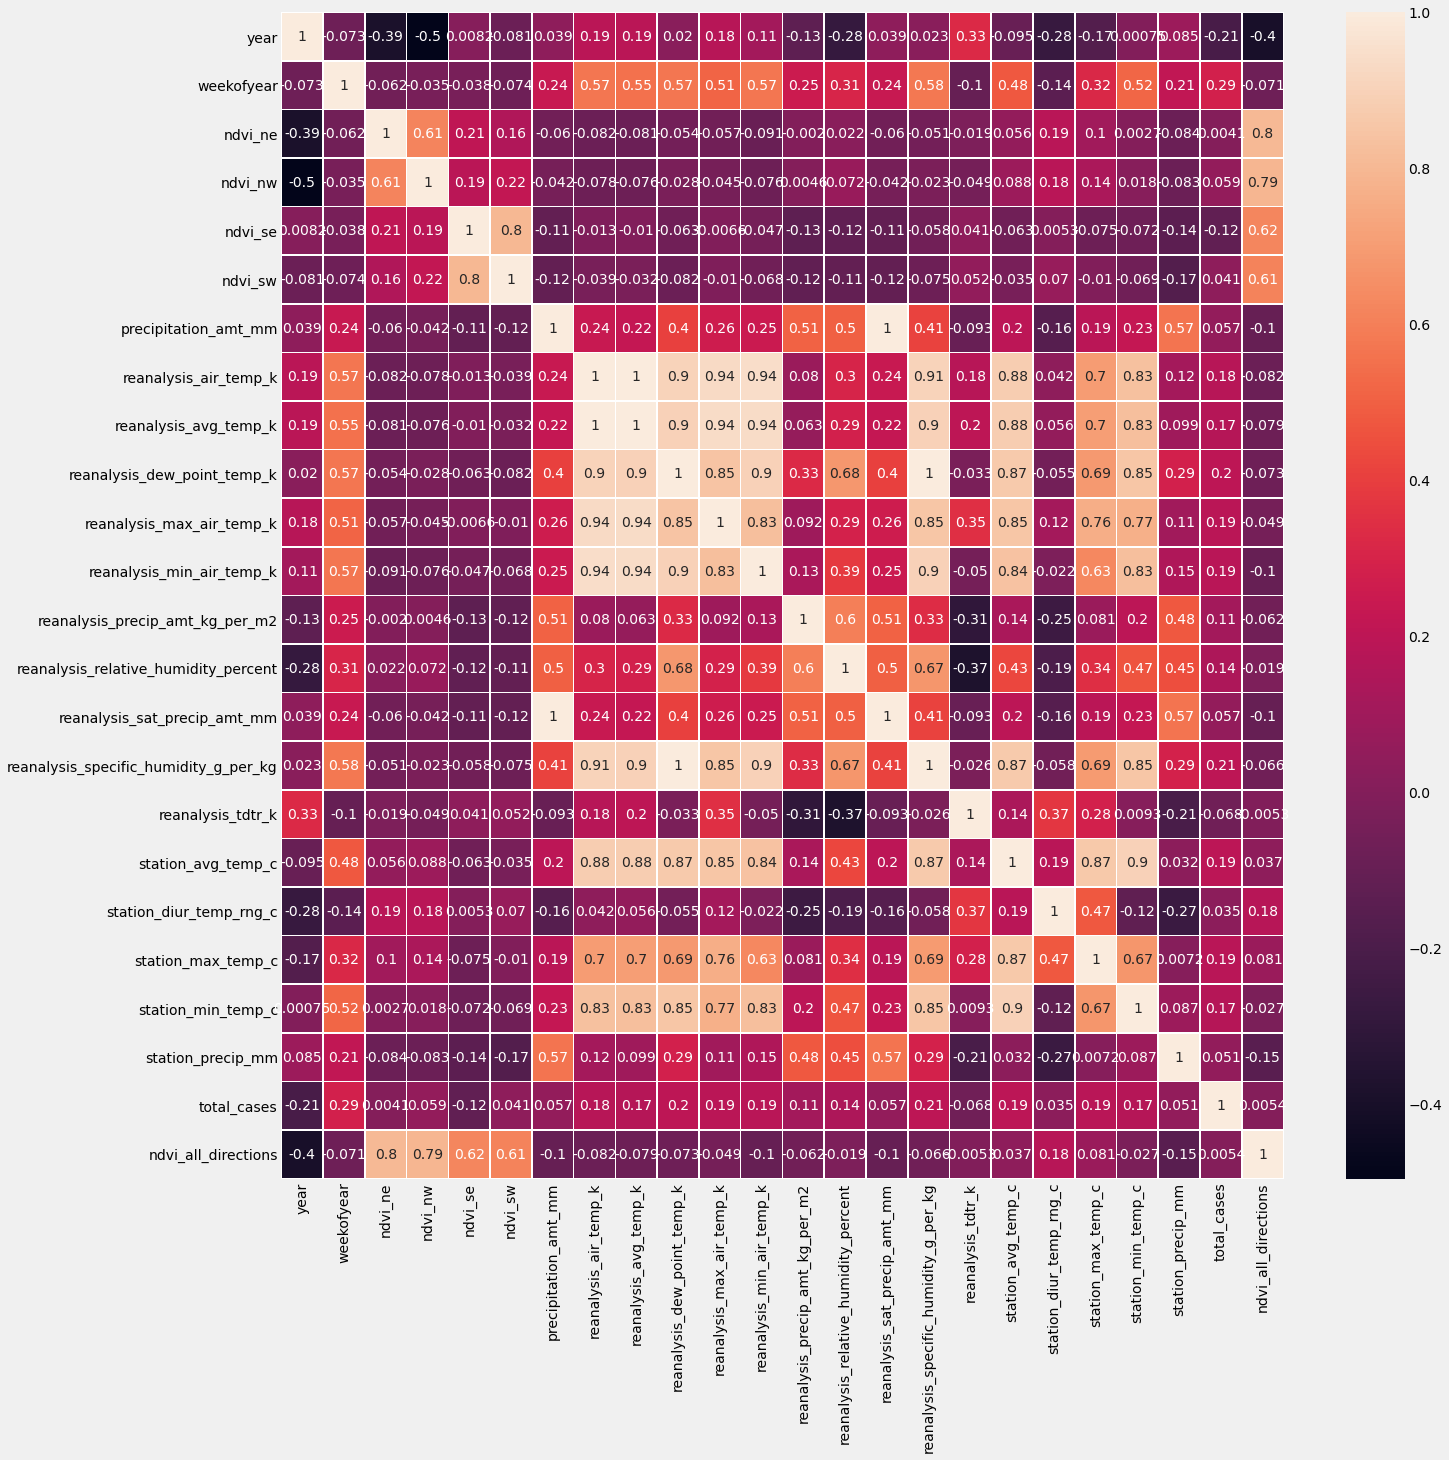

In [1279]:
# San Juan
data_corr = sj.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(data_corr,annot=True,linewidths=.6, ax=ax)





*  Apparently total number of dengue cases has no correlation with any feature.
Temperature: The temperature variables (reanalysis_air_temp_k to reanalysis_min_air_temp_k) are strongly correlated together in San Juan.





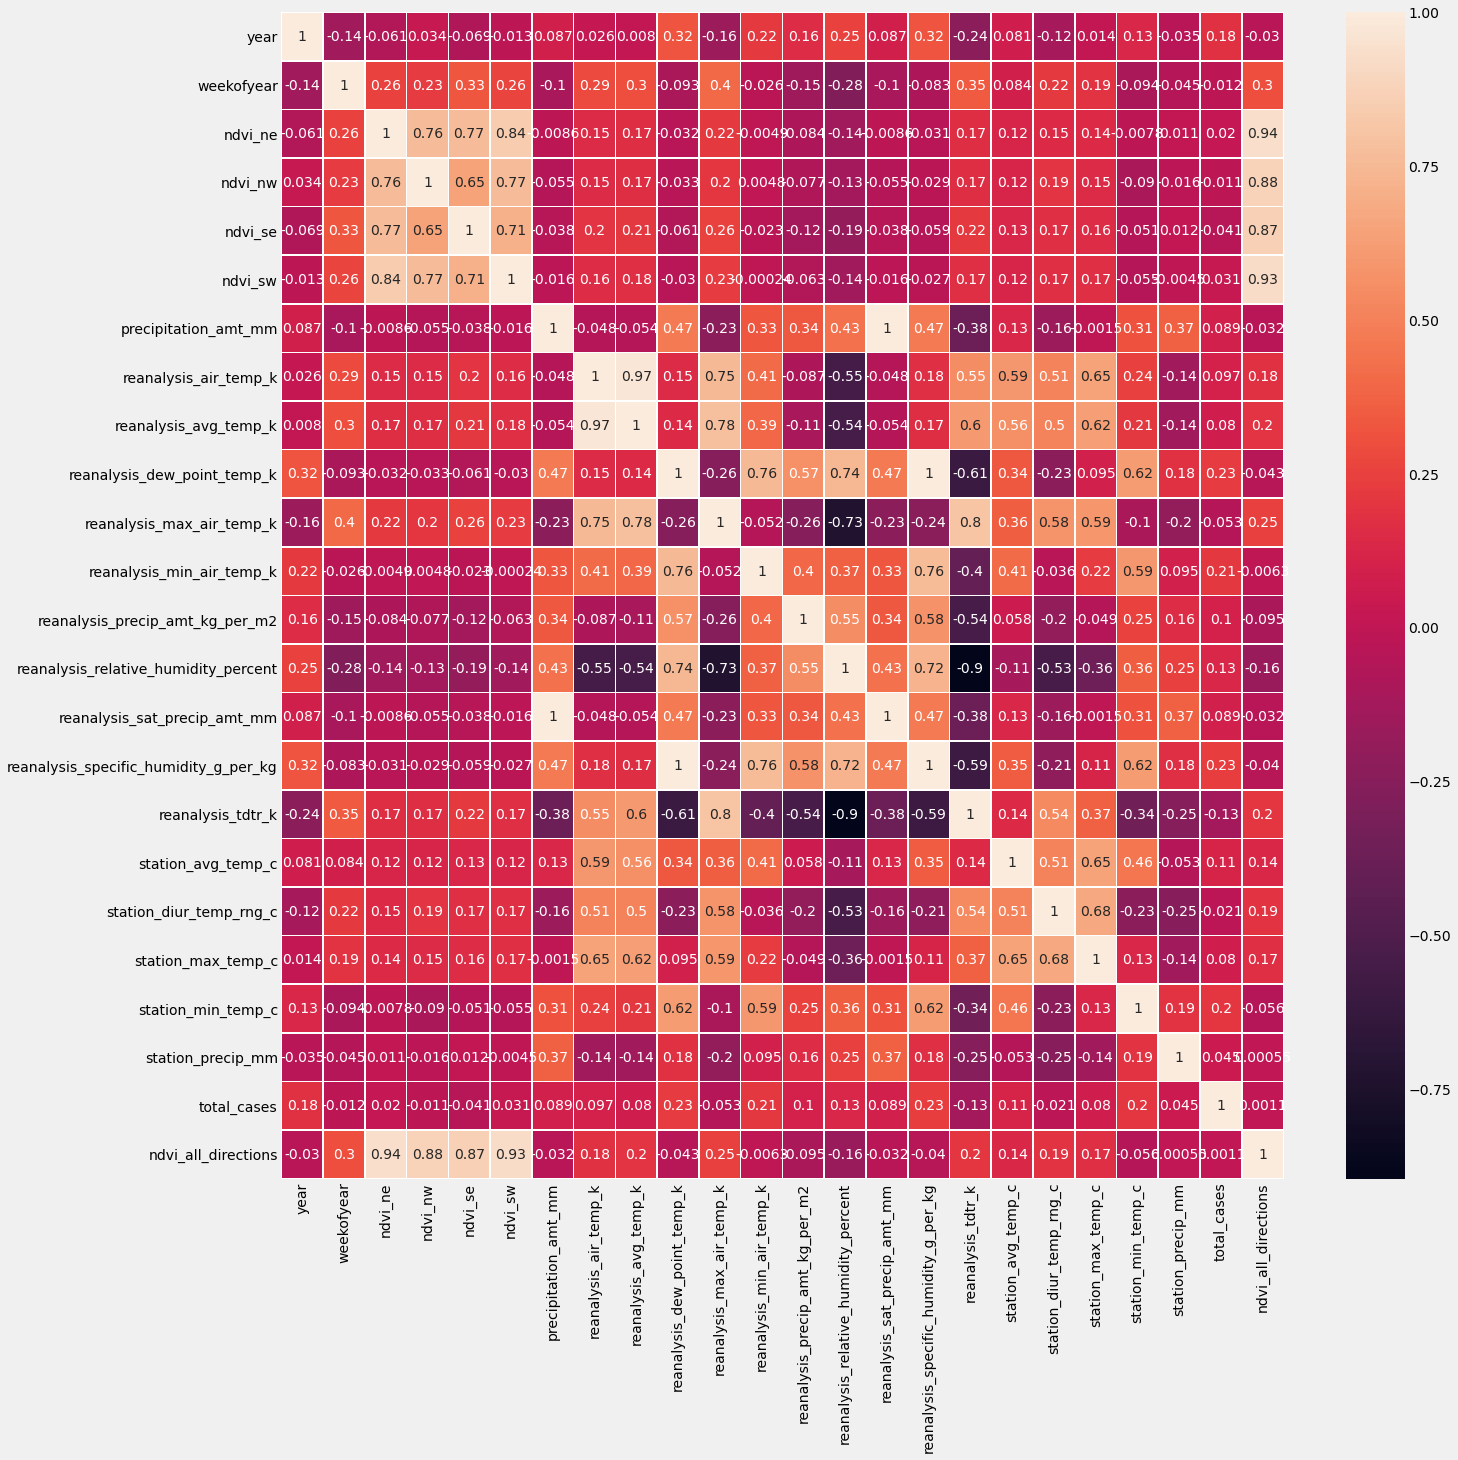

In [1280]:
#Iquitos
data_corr2 = iq.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(data_corr2,annot=True,linewidths=.6, ax=ax)

*   There is a correlation in NVDI for north east and south east in Iquitos.
*   Similarly withthe total number of cases at Iquitos there is no correlation.



In [1281]:
# create mean NVDI for each week for each city
sj['nvdi_mean'] = sj[sj.columns[3:7]].mean(axis = 1)
iq['nvdi_mean'] = iq[iq.columns[3:7]].mean(axis = 1)

In [1282]:
sj.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,ndvi_all_directions,ndvi_desc,nvdi_mean
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0.150606,rock/sand,0.141603
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0.157479,rock/sand,0.158144
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0.133315,rock/sand,0.120806
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0.209286,shrub/grassland,0.200419
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0.239235,shrub/grassland,0.236533


Span of years.

In [1283]:
sj['week_start_date'].min(),sj['week_start_date'].max()

(Timestamp('1990-04-30 00:00:00'), Timestamp('2008-04-22 00:00:00'))

Precipitation in amounts over the years

In [1284]:
sj1 = sj.groupby('week_start_date')['precipitation_amt_mm'].sum().reset_index()
sj1 = sj1.set_index('week_start_date')
sj1.index

DatetimeIndex(['1990-04-30', '1990-05-07', '1990-05-14', '1990-05-21',
               '1990-05-28', '1990-06-04', '1990-06-11', '1990-06-18',
               '1990-06-25', '1990-07-02',
               ...
               '2008-02-19', '2008-02-26', '2008-03-04', '2008-03-11',
               '2008-03-18', '2008-03-25', '2008-04-01', '2008-04-08',
               '2008-04-15', '2008-04-22'],
              dtype='datetime64[ns]', name='week_start_date', length=936, freq=None)

In [1285]:
d =sj1['precipitation_amt_mm'].resample('M').mean()
d['2006':]

week_start_date
2006-01-31    45.4900
2006-02-28     7.4875
2006-03-31    12.0200
2006-04-30    81.5060
2006-05-31    43.5525
2006-06-30    28.0900
2006-07-31    53.3720
2006-08-31    57.8525
2006-09-30    42.5200
2006-10-31    48.7620
2006-11-30    25.2050
2006-12-31    19.0800
2007-01-31    12.6820
2007-02-28     0.0000
2007-03-31    10.7100
2007-04-30    53.3000
2007-05-31    17.1325
2007-06-30    52.5175
2007-07-31    29.4100
2007-08-31    51.8050
2007-09-30    51.4750
2007-10-31    70.8700
2007-11-30    36.6425
2007-12-31    27.8150
2008-01-31    23.6920
2008-02-29     0.0000
2008-03-31     6.7975
2008-04-30     5.1950
Freq: M, Name: precipitation_amt_mm, dtype: float64

Resampling generates a unique sampling distribution on the basis of the actual data. We can apply various frequency to resample our time series data. This is a very important technique in the field of analytics.
Most commonly used time series frequency are –
W : weekly frequency
M : month end frequency
SM : semi-month end frequency (15th and end of month)
Q : quarter end frequency

Visualize precipitation amounts in San Juan

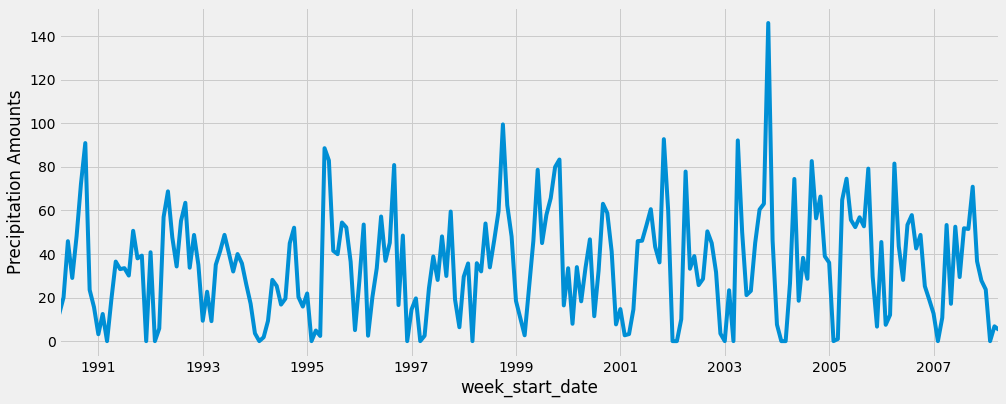

In [1286]:
d.plot(figsize=(15, 6))
plt.ylabel("Precipitation Amounts")
plt.show()

Precipitation amounts have been constant over the years.

In [1287]:
sj_new = sj.copy()
iq_new = iq.copy()

##### Climatic Conditions(Weather)

To visualize weather conditions we will need to standardize them to do away with the units.

In [1288]:
from sklearn.preprocessing import StandardScaler

#Standardizing San Juan Features.
scaler = StandardScaler()
features = sj_new.columns[8:24]
scaled_sj = scaler.fit_transform(sj_new[features])
scaled_sj = pd.DataFrame(scaled_sj, columns = features, index=sj_new.index)
scaled_sj['weekofyear'] = sj_new['weekofyear']

#Standardizing Iquitos features.
features2 = iq_new.columns[8:24]
scaled_iq = scaler.fit_transform(iq_new[features])
scaled_iq = pd.DataFrame(scaled_iq, columns = features, index=iq_new.index)
scaled_iq['weekofyear'] = iq_new['weekofyear']
scaled_iq.head()

,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,weekofyear
936,-1.108024,-0.965058,-0.511702,-0.222531,0.097625,0.132999,-0.287564,0.495401,-1.108024,-0.312550,-0.106482,-1.218294,0.188781,-1.083150,-0.406188,-0.931223,26
937,-0.106517,-1.055384,-0.527794,-0.099187,-0.195572,-1.070817,-0.231451,0.648949,-0.106517,-0.165894,0.458286,-0.667693,0.696203,0.024569,-0.326603,-0.095081,27
938,-0.251337,-1.242140,-1.305601,0.087852,-1.075160,-0.167955,0.143368,0.948312,-0.251337,0.012472,-0.735296,-0.777813,0.632107,-0.713910,-0.406188,-0.373265,28
939,-1.671656,-2.146624,-2.179963,-1.911946,-1.452127,-2.575587,-0.671569,-0.189153,-1.671656,-1.852441,-0.030791,-1.915722,0.033884,-1.821628,-5.181264,-0.502025,29
940,-0.045345,-1.227492,-1.123219,-1.090998,-0.028031,-0.830054,-0.515012,-0.066729,-0.045345,-1.149878,0.126412,-0.998054,0.640653,-0.492367,-1.679541,-0.915327,30


Since weather conditions are best described during time of the year, We will plot our weather conditions against mweek of the year.

##### **San Juan Weather Conditions**

###### 1.Precipitation

Text(0.5, 0, 'Week of Year')

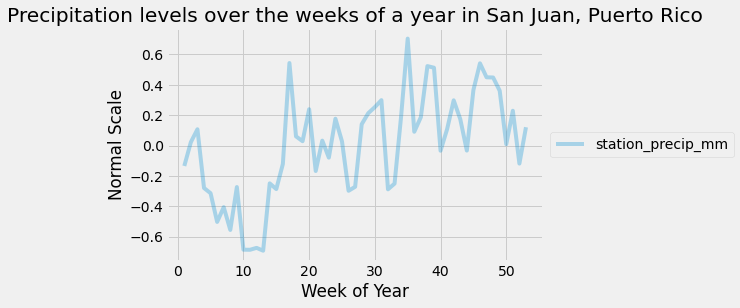

In [1289]:
#selecting columns
precipitation_sj = scaled_sj.iloc[:,[15,16]]
precipitation_sj.head()

precipitation_sj.groupby('weekofyear').mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Precipitation levels over the weeks of a year in San Juan, Puerto Rico')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

In [1290]:
#selecting columns
#precipitation_sj = scaled_sj.iloc[:,[0,6,8,15,16]]

#plt.subplots(figsize=(15, 5))

#for i in (precipitation_sj.columns[0:4]):
#  precipitation_sj.groupby('weekofyear')[i].mean().plot(alpha=0.3)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title('Precipitation levels over the weeks of a year in San Juan, Puerto Rico')
#plt.ylabel('Normal Scale')
#plt.xlabel('Week of Year')

###### 2.Temperatures in San Juan Throughout the year

In [1291]:
scaled_sj.columns

Index(['precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'weekofyear'],
      dtype='object')

Text(0.5, 0, 'Week of Year')

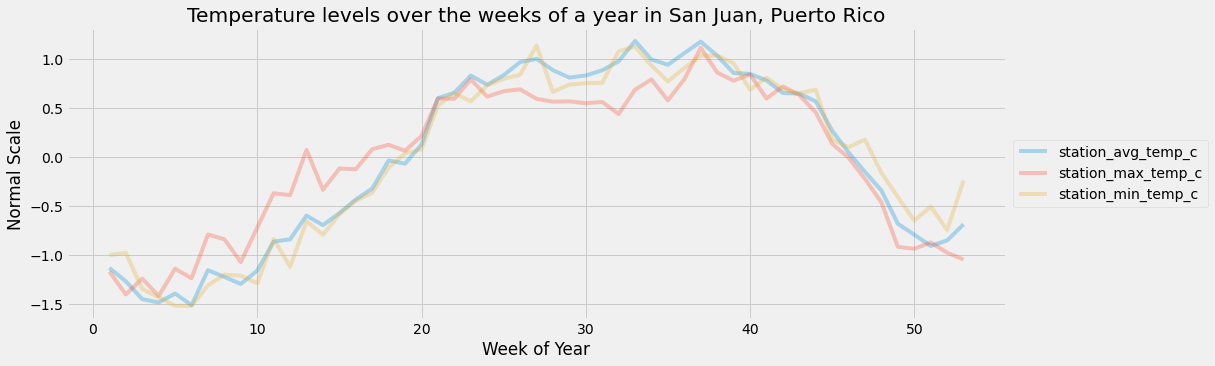

In [1292]:
#selecting columns
temp_sj = scaled_sj.iloc[:,[11,13,14,16]]

plt.subplots(figsize=(15, 5))

for i in (temp_sj.columns[0:3]):
  temp_sj.groupby('weekofyear')[i].mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Temperature levels over the weeks of a year in San Juan, Puerto Rico')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Temperatures are lower around the 25th week and rise from week 30 all the way to week 40.

###### 3.Humidity.

Text(0.5, 0, 'Week of Year')

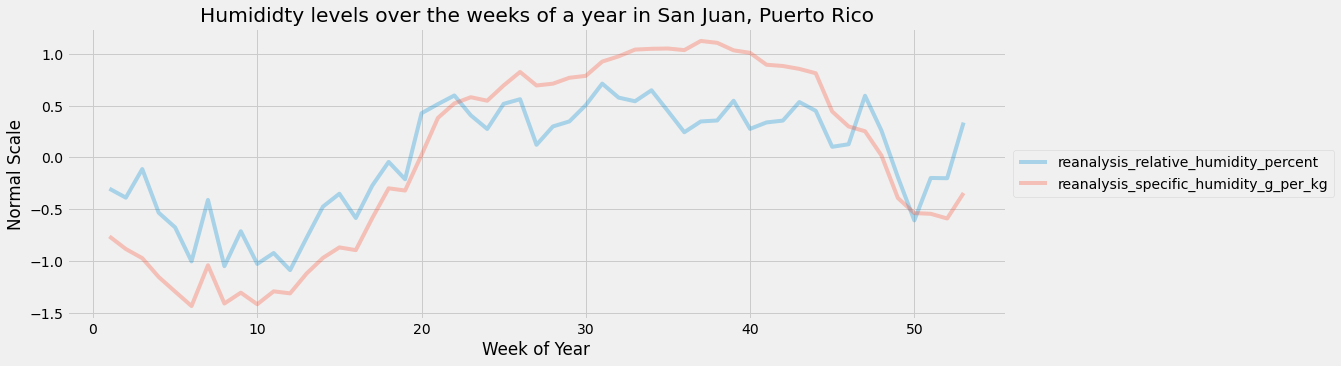

In [1293]:
#selecting columns
humidity_sj = scaled_sj.iloc[:,[7,9,16]]

plt.subplots(figsize=(15, 5))

for i in (humidity_sj.columns[0:2]):
  humidity_sj.groupby('weekofyear')[i].mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Humididty levels over the weeks of a year in San Juan, Puerto Rico')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Humidity is high from week 20 all the way to week 40.

###### 4.NVDI-Vegetation cover

Finding the mean of vegetation for each week in the four quadrants.(NE,NW,SE,SW)

Since the four features represent the different parts of the city(San Juan) we can as well get an average of vegetation cover per week.

In [1294]:
# creating the  mean NVDI for each week for each city
sj_new['nvdi_mean'] = sj_new[sj_new.columns[4:8]].mean(axis = 1)
iq_new['nvdi_mean'] = iq_new[iq_new.columns[4:8]].mean(axis = 1)

Mean of NVDI over the weeks.

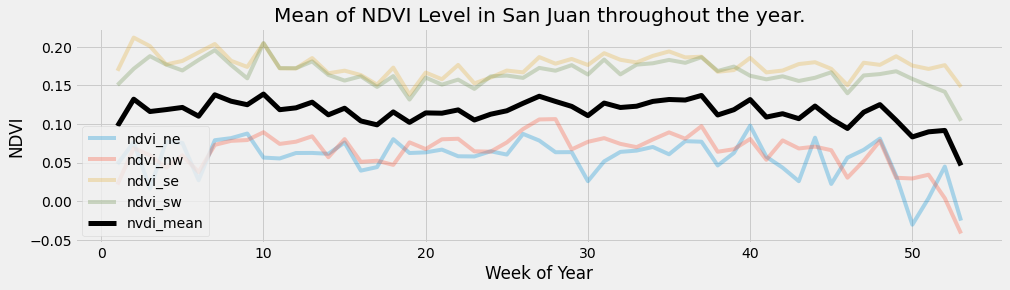

In [1295]:
# plot week by week average vegetation for San Juan
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

plt.subplot()
for name in sj_new.columns[4:8]:
  sj_new.groupby('weekofyear')[name].mean().plot(alpha = .3)
sj_new.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5) 
plt.title('Mean of NDVI Level in San Juan throughout the year.')
plt.xlabel('Week of Year')
plt.ylabel('NDVI')
plt.legend(loc = 'best')
plt.tight_layout(pad=3)


The NVDI scores in SW and SE are lower than the scores of NW and NE but then the average remains constant.There is a decresase around the last months of the years though.

**Mean of NVDI over the years In San Juan Purto Rico.**

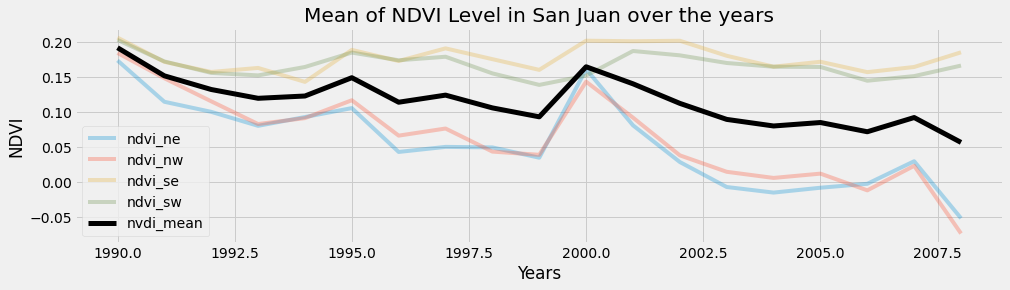

In [1296]:
# plot week by week average vegetation for San Juan
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

plt.subplot()
for name in sj_new.columns[4:8]:
  sj_new.groupby('year')[name].mean().plot(alpha = .3)
sj_new.groupby('year')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5) 
plt.title('Mean of NDVI Level in San Juan over the years')
plt.xlabel('Years')
plt.ylabel('NDVI')
plt.legend(loc = 'best')
plt.tight_layout(pad=3)


On average te number of dengue cases rise from week 25(June) till week 40(September) when it's at the peek then go down significantly over the weeks and is lowest between week 10(March) and week 20(May).

#### **Iquitos Weather Conditions**.

In [1297]:
scaled_iq.columns

Index(['precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'weekofyear'],
      dtype='object')

###### 1.Precipitation.

Text(0.5, 0, 'Week of Year')

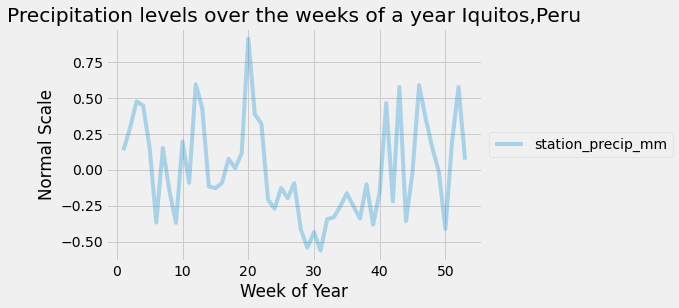

In [1298]:
#selecting columns
precipitation_iq = scaled_iq.iloc[:,[15,16]]

precipitation_iq.groupby('weekofyear').mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Precipitation levels over the weeks of a year Iquitos,Peru')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Humidity is a measure of the amount of water vapour being held in the air. Water vapour is a gas. Precipitation is when the gas turns to liquid or solid and forms rain, snow, hail, mist, fog, frost, dew etc

###### 2.Temperatures in Iquitos,Peru throughout the year.

In [1299]:
scaled_iq.columns

Index(['precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'weekofyear'],
      dtype='object')

Text(0.5, 0, 'Week of Year')

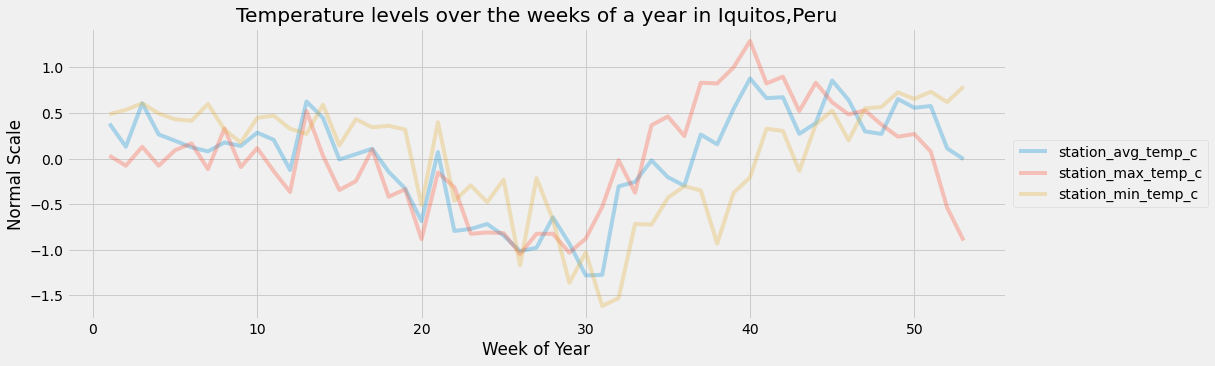

In [1300]:
#selecting columns
temp_iq = scaled_iq.iloc[:,[11,13,14,16]]

plt.subplots(figsize=(15, 5))

for i in (temp_iq.columns[0:3]):
  temp_iq.groupby('weekofyear')[i].mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Temperature levels over the weeks of a year in Iquitos,Peru')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

In Iquitos, Temeratures are lower at week 20 to week 30 then there is a rise at week 30 until week 40.

###### 3.Humidity Levels in Iquitos,Peru.

Text(0.5, 0, 'Week of Year')

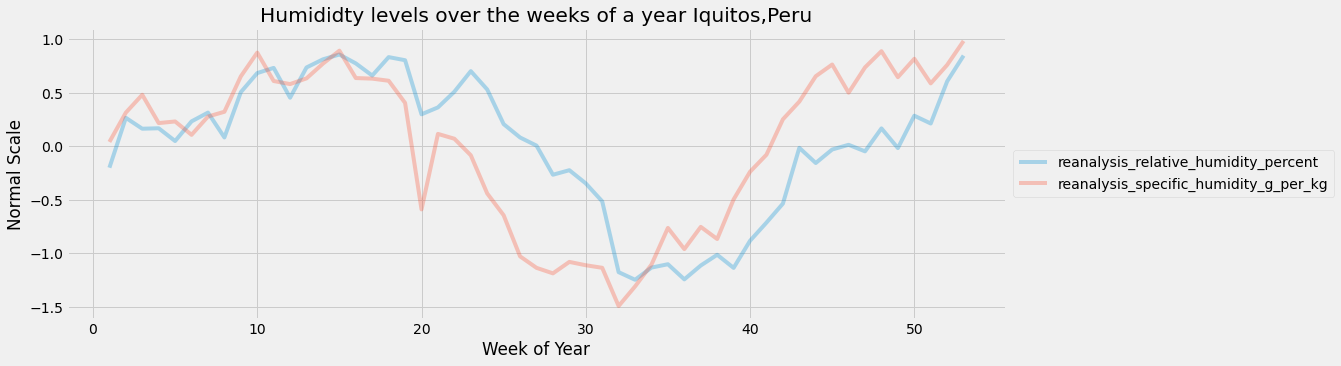

In [1301]:
#selecting columns
humidity_iq = scaled_iq.iloc[:,[7,9,16]]

plt.subplots(figsize=(15, 5))

for i in (humidity_iq.columns[0:2]):
  humidity_iq.groupby('weekofyear')[i].mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Humididty levels over the weeks of a year Iquitos,Peru')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Humididty levela go low as temperature gets rising at week 30 there about.

###### 4.NVDI-Vegetation cover - Iquitos,Peru.


Mean of NVDI over the weeks in Iquitos,Peru.


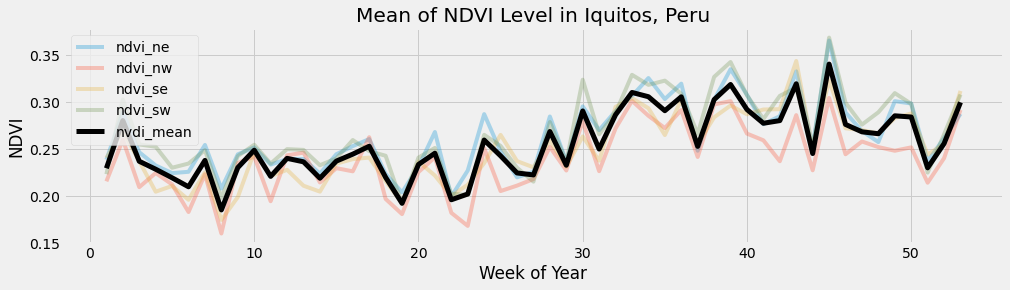

In [1302]:
# plot week by week average vegetation for San Juan
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

plt.subplot()
for name in iq_new.columns[4:8]:
  iq_new.groupby('weekofyear')[name].mean().plot(alpha = .3)
iq_new.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5) 
plt.title('Mean of NDVI Level in Iquitos, Peru')
plt.xlabel('Week of Year')
plt.ylabel('NDVI')
plt.legend(loc = 'best')
plt.tight_layout(pad=3)


Iquitos show a consistent NVDI score throughout though there is an rise around week 25 to 45 there about.

Mean of NVDI over the years in Iquitos,Peru.

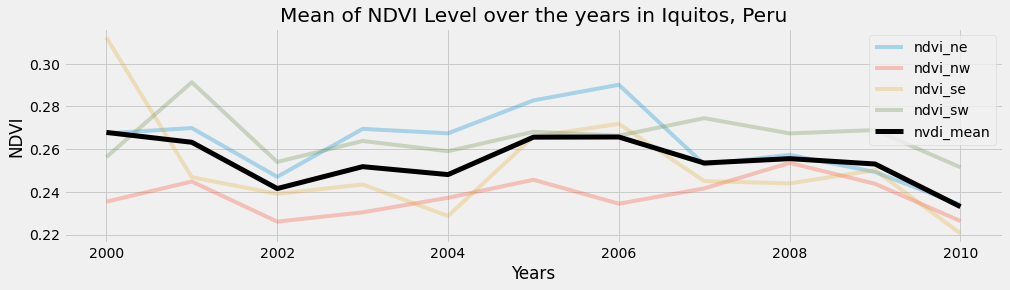

In [1303]:
# plot week by week average vegetation for Iquitos.
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

plt.subplot()
for name in iq_new.columns[4:8]:
  iq_new.groupby('year')[name].mean().plot(alpha = .3)
iq_new.groupby('year')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5) 
plt.title('Mean of NDVI Level over the years in Iquitos, Peru')
plt.xlabel('Years')
plt.ylabel('NDVI')
plt.legend(loc = 'best')
plt.tight_layout(pad=3)#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.


###### Distribution of Total Cases Over the years.

Text(0.5, 1.0, 'Distribution of Total Dengue cases over the years in Iquitos')

<Figure size 432x288 with 0 Axes>

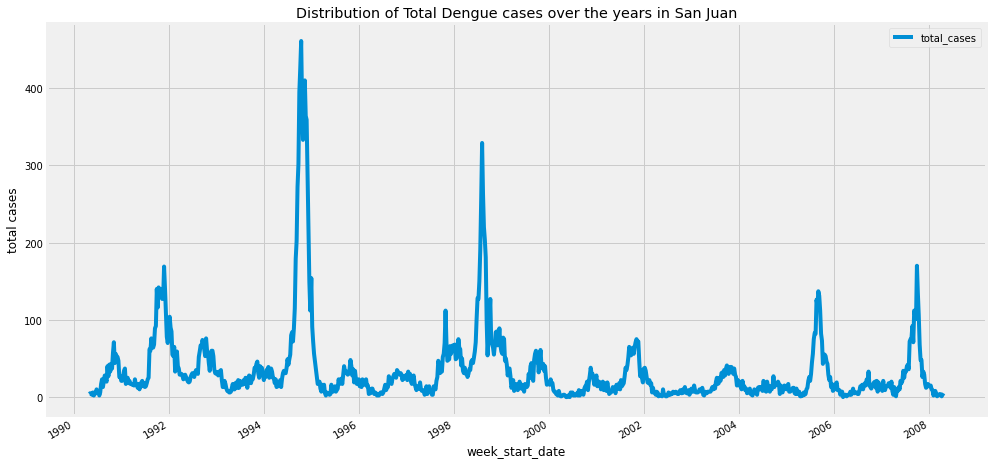

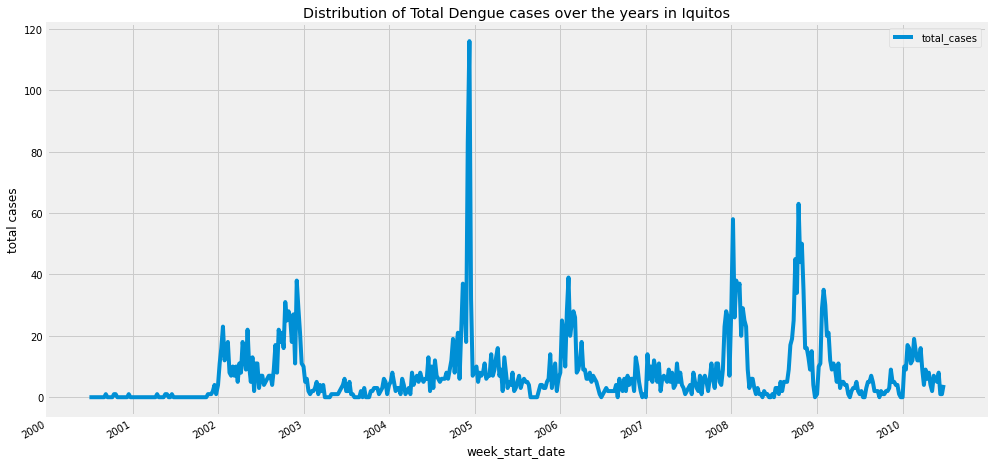

In [1304]:
%matplotlib inline

plt.figure()
ax = sj[['week_start_date', 'total_cases']].plot('week_start_date', figsize=(15,8))
ax1 = iq[['week_start_date', 'total_cases']].plot('week_start_date', figsize=(15,8))
ax.set_ylabel('total cases')
ax1.set_ylabel('total cases')#Iquitos

ax.set_title('Distribution of Total Dengue cases over the years in San Juan')
ax1.set_title('Distribution of Total Dengue cases over the years in Iquitos')

**San Juan**

From June 1994 to May 1995, a very high number of dengue cases was recorded in San Juan, Puerto Rico. This epidemic produced the largest number of hospitalizations.

Also at the onset of 1999 there was relatively high reports of cases of people that were infected with Dengue.


**Iquitos.**

There was a high recording of dengue cases in Iquitos at the end of 2004 approaching 2005 and later rose between 2008 and 2009.[link text](https://www.researchgate.net/figure/Dengue-epidemics-overlaid-to-illustrate-shifting-of-peak-incidence-The-epidemics-are_fig10_264009350)

We could refer to this outliers as outbreaks.


###### Total Cases over the weeks.
1. San Juan, Puerto Rico.

Text(0.5, 0, 'Week of Year')

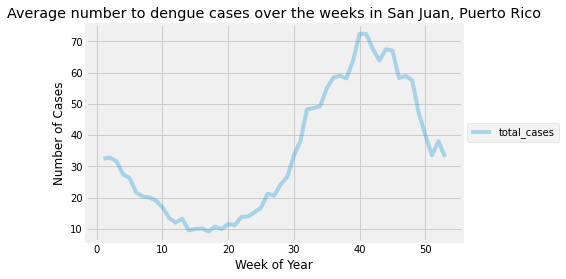

In [1305]:
df = scaled_sj.copy()
df['total_cases'] = sj['total_cases']

#selecting columns
df1 = df[['total_cases','weekofyear']]

df1.groupby('weekofyear').mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average number to dengue cases over the weeks in San Juan, Puerto Rico')
plt.ylabel('Number of Cases')
plt.xlabel('Week of Year')

In San Juan, Puerto Rico, the average number of cases reported per week is normally lowfrom beginning of week 10(March) to week 20(May) then rises after that and is highest at week 40 which is around October before a gradual decrease again.

2. Iquitos

Text(0.5, 0, 'Week of Year')

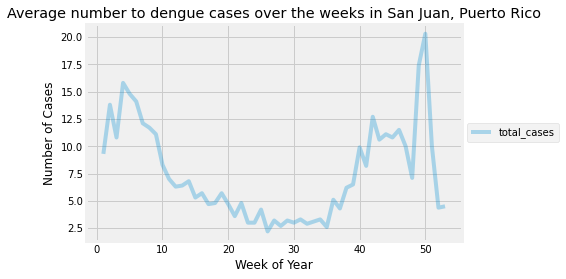

In [1306]:
df11 = scaled_iq.copy()
df11['total_cases'] = iq['total_cases']

#selecting columns
df111 = df11[['total_cases','weekofyear']]

df111.groupby('weekofyear').mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average number to dengue cases over the weeks in San Juan, Puerto Rico')
plt.ylabel('Number of Cases')
plt.xlabel('Week of Year')

In Iquitos, dengue cases are rise from week 35 and is highest at week 50(December) then drops for a span of two weeks and rises again in January.
Cases are low in the middle of the year.

Findings;
*   List item
*   List item



### **Trends of Climatic Conditions and Total Number of Cases**

San Juan

In [1307]:
sj_new.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,ndvi_all_directions,ndvi_desc,nvdi_mean
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0.150606,rock/sand,0.150606
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0.157479,rock/sand,0.157479
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0.133315,rock/sand,0.133315
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0.209286,shrub/grassland,0.209286
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0.239235,shrub/grassland,0.239235


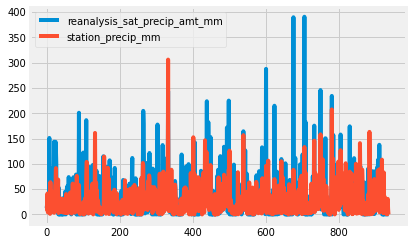

In [1308]:
#compare both precipitation columns
sj[['reanalysis_sat_precip_amt_mm','station_precip_mm']].plot()

Reanalysis datasets are created by assimilating ("inputting") climate observations using the same climate model throughout the entire reanalysis period in order to reduce the affects of modeling changes on climate statistics.

In this case reanalysis precipitation is higher than station precipitation(actual recorded data)

### **Decomposing Data** 
This enables us to see trends, seasonality and noise in the data.

In [1309]:
sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,ndvi_all_directions,ndvi_desc,nvdi_mean
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0.150606,rock/sand,0.141603
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0.157479,rock/sand,0.158144
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0.133315,rock/sand,0.120806
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0.209286,shrub/grassland,0.200419
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0.239235,shrub/grassland,0.236533


In [1310]:
from pylab import rcParams

dec = sj[['week_start_date','total_cases']]
dec.set_index('week_start_date',inplace=True)
dec.head()

,total_cases
week_start_date,
1990-04-30,4
1990-05-07,5
1990-05-14,4
1990-05-21,3
1990-05-28,6


No handles with labels found to put in legend.


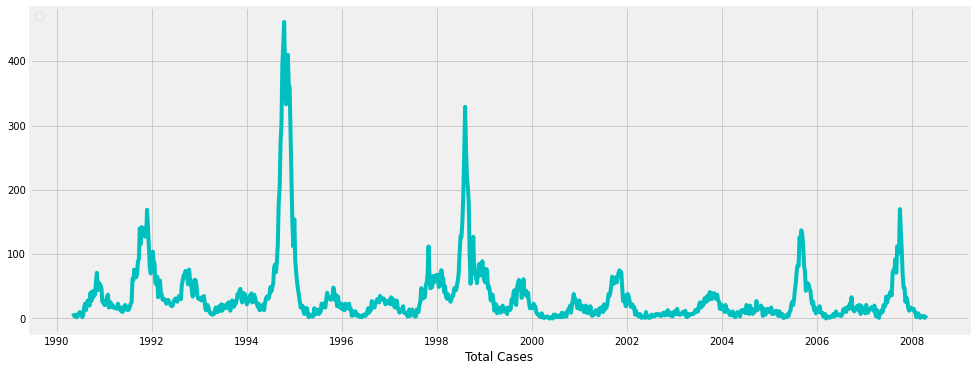

In [1311]:
plt.figure(figsize=(15,6))
plt.plot(dec.index, dec, color='c', label=None)
plt.xlabel('Years')
plt.xlabel('Total Cases')
plt.legend(loc=2)
plt.show()

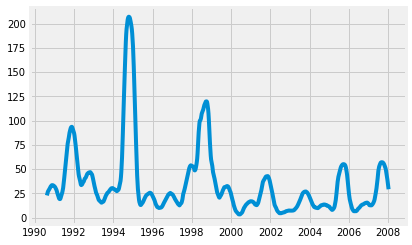

In [1312]:
#Decomposing to three components 
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

#Use an additive model
result = seasonal_decompose(dec, model='additive',freq=30)

plt.plot(result.trend)

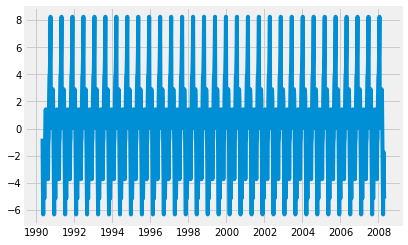

In [1313]:
plt.plot(result.seasonal)

the seasonal one repeats at regular intervals of time.

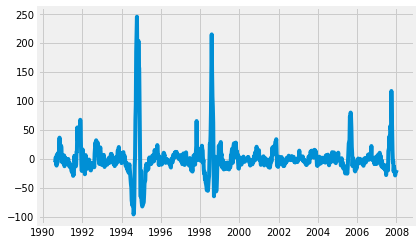

In [1314]:
plt.plot(result.resid)

The plot above clearly shows shat the total number of dengue cases is unstable along with its obvious seasonality. 

### FEATURE SELECTION.

Text(0.5, 1.0, 'Correlation with total_cases in "sj"')

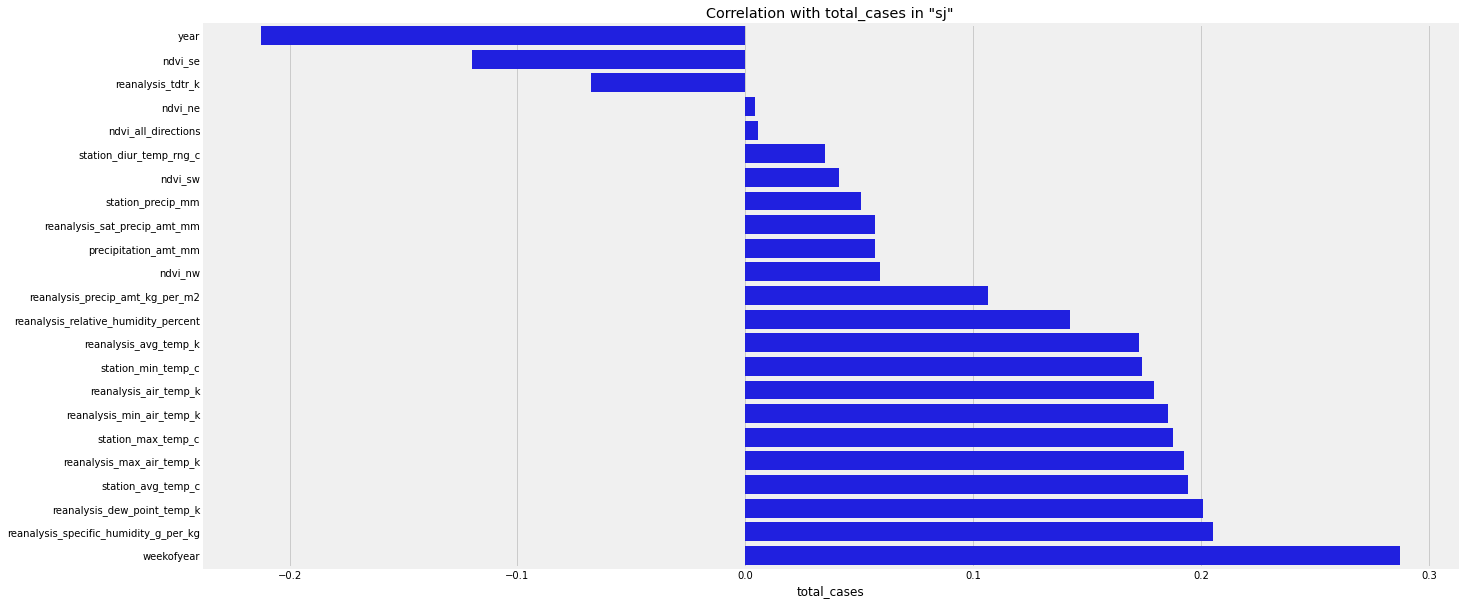

In [1315]:
sorted_features = data_corr.sort_values(by='total_cases', axis=0).drop('total_cases')
plt.figure(figsize=(20, 10))
ax = sns.barplot(x=sorted_features.total_cases, y=sorted_features.index, color="b")
ax.set_title('Correlation with total_cases in "sj"')

In [1316]:
sj.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,ndvi_all_directions,ndvi_desc,nvdi_mean
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0.150606,rock/sand,0.141603
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0.157479,rock/sand,0.158144
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0.133315,rock/sand,0.120806
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0.209286,shrub/grassland,0.200419
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0.239235,shrub/grassland,0.236533


In [1317]:
from sklearn.model_selection import train_test_split

#split features from labels
y = sj[['total_cases']]  # target variable 
X = sj.drop(['total_cases','city','week_start_date','ndvi_all_directions','ndvi_desc','nvdi_mean'], axis=1)  # input variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Standardising the X_train and the X_test to the same scale
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#creating model. creat regressor object and train it using train data
# Building the Logistic Regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 1)      
lr_baseline_model = log_reg.fit(X_train,y_train)

# Noting down accuracy of the baseline model
from sklearn.metrics import accuracy_score, f1_score

# finding our predicted values
y_pred = lr_baseline_model.predict(X_test)#

# Calculating the accuracy and F1 Score by comparing the actual and predicted values
ac = accuracy_score(y_test, y_pred)

print("Baseline Model Accuracy:", ac)


Baseline Model Accuracy: 0.047872340425531915


In [1318]:
from sklearn.model_selection import train_test_split

#split features from labels
y = sj[['total_cases']]  # target variable 
X = sj.drop(['total_cases','city','week_start_date','ndvi_all_directions','ndvi_desc','nvdi_mean'], axis=1)  # input variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Standardising the X_train and the X_test to the same scale
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#creating model. creat regressor object and train it using train data
# Building the Logistic Regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 1)      
lr_baseline_model = log_reg.fit(X_train,y_train)

# Noting down accuracy of the baseline model
from sklearn.metrics import accuracy_score, f1_score

# finding our predicted values
y_pred = lr_baseline_model.predict(X_test)#

# Calculating the accuracy and F1 Score by comparing the actual and predicted values
ac = accuracy_score(y_test, y_pred)

print("Baseline Model Accuracy:", ac)


Baseline Model Accuracy: 0.047872340425531915


In [1319]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= log_reg , step = 1) 
# estimator log_reg is the baseline model (basic model) that we have created under "Base line Model" selection
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.

#Fit the function for ranking the features
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 11
Selected Features: [ True  True False False  True  True False False False False  True  True
 False False  True False  True False False  True  True  True]
Feature Ranking: [ 1  1  5  7  1  1  9 10  8 12  1  1  4  2  1 11  1  6  3  1  1  1]


In [1320]:
X.info()#0,1,4,5,10,11,14,16,19,20,21

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   year                                   936 non-null    int64  
 1   weekofyear                             936 non-null    int64  
 2   ndvi_ne                                936 non-null    float64
 3   ndvi_nw                                936 non-null    float64
 4   ndvi_se                                936 non-null    float64
 5   ndvi_sw                                936 non-null    float64
 6   precipitation_amt_mm                   936 non-null    float64
 7   reanalysis_air_temp_k                  936 non-null    float64
 8   reanalysis_avg_temp_k                  936 non-null    float64
 9   reanalysis_dew_point_temp_k            936 non-null    float64
 10  reanalysis_max_air_temp_k              936 non-null    float64
 11  reanal

In [1321]:
selected_rfe_features = pd.DataFrame({'Feature':list(X.iloc[:, 0:]),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,year,1
19,station_max_temp_c,1
16,reanalysis_tdtr_k,1
14,reanalysis_sat_precip_amt_mm,1
11,reanalysis_min_air_temp_k,1
20,station_min_temp_c,1
10,reanalysis_max_air_temp_k,1
5,ndvi_sw,1
4,ndvi_se,1
1,weekofyear,1


In [1322]:
sj_final = sj[['year','station_max_temp_c','reanalysis_tdtr_k','reanalysis_sat_precip_amt_mm','reanalysis_min_air_temp_k',
               'station_min_temp_c','reanalysis_max_air_temp_k','weekofyear','ndvi_sw','ndvi_se','station_precip_mm']]
sj_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          936 non-null    int64  
 1   station_max_temp_c            936 non-null    float64
 2   reanalysis_tdtr_k             936 non-null    float64
 3   reanalysis_sat_precip_amt_mm  936 non-null    float64
 4   reanalysis_min_air_temp_k     936 non-null    float64
 5   station_min_temp_c            936 non-null    float64
 6   reanalysis_max_air_temp_k     936 non-null    float64
 7   weekofyear                    936 non-null    int64  
 8   ndvi_sw                       936 non-null    float64
 9   ndvi_se                       936 non-null    float64
 10  station_precip_mm             936 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 87.8 KB


In [1323]:
sj_final.columns

Index(['year', 'station_max_temp_c', 'reanalysis_tdtr_k',
       'reanalysis_sat_precip_amt_mm', 'reanalysis_min_air_temp_k',
       'station_min_temp_c', 'reanalysis_max_air_temp_k', 'weekofyear',
       'ndvi_sw', 'ndvi_se', 'station_precip_mm'],
      dtype='object')

In [1324]:
sj_final1 = sj[['year', 'station_max_temp_c', 'reanalysis_tdtr_k',
       'reanalysis_sat_precip_amt_mm', 'reanalysis_min_air_temp_k',
       'station_min_temp_c', 'reanalysis_max_air_temp_k', 'weekofyear',
       'ndvi_sw', 'ndvi_se', 'station_precip_mm','total_cases']]
sj_final1.head()       

,year,station_max_temp_c,reanalysis_tdtr_k,reanalysis_sat_precip_amt_mm,reanalysis_min_air_temp_k,station_min_temp_c,reanalysis_max_air_temp_k,weekofyear,ndvi_sw,ndvi_se,station_precip_mm,total_cases
0,1990,29.4,2.628571,12.42,295.9,20.0,299.8,18,0.177617,0.198483,16.0,4
1,1990,31.7,2.371429,22.82,296.4,22.2,300.9,19,0.155486,0.162357,8.6,5
2,1990,32.2,2.300000,34.54,297.3,22.8,300.5,20,0.170843,0.157200,41.4,4
3,1990,33.3,2.428571,15.36,297.0,23.3,301.4,21,0.235886,0.227557,4.0,3
4,1990,35.0,3.014286,7.52,297.5,23.9,301.9,22,0.247340,0.251200,5.8,6


In [1325]:
sj.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases',
       'ndvi_all_directions', 'ndvi_desc', 'nvdi_mean'],
      dtype='object')

In [1326]:
df33 = sj.drop(['city','week_start_date','ndvi_desc','nvdi_mean','ndvi_all_directions'],1)
df33.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


[0.21347482 0.17997199 0.01108381 0.01137659 0.19215596 0.12521582
 0.00684776 0.0192649  0.01874758 0.03463178 0.01901415 0.007558
 0.01713633 0.0121008  0.00663571 0.03330953 0.01393309 0.01493989
 0.01562834 0.02407448 0.00728866 0.01561001]


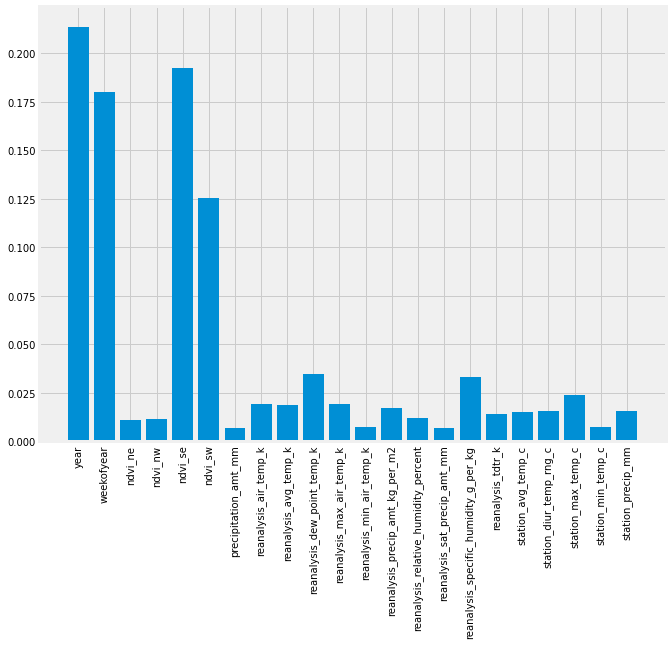

In [1327]:
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

f, ax = plt.subplots(figsize=(10,8)) # set the size that you'd like (width, height)

# load data
array = df33.values
# split into input and output
X = df33.drop('total_cases',1)
y = df33['total_cases']
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
# show importance scores
print(model.feature_importances_)
# plot importance scores
names = df33.columns.values[0:-1]
scores = [i for i in range(len(names))]
pyplot.bar(scores, model.feature_importances_)
pyplot.xticks(scores, names)
plt.xticks(rotation=90)
pyplot.show()

In [1328]:
# Get numerical feature importances
importance = model.feature_importances_

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importance)]

# printing feature inportances
print(feature_importances) 
print()

# Sorting the values in descending order, since we want to see the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:21} Importance: {}'.format(*pair)) for pair in feature_importances];

[('year', 0.21), ('weekofyear', 0.18), ('ndvi_ne', 0.01), ('ndvi_nw', 0.01), ('ndvi_se', 0.19), ('ndvi_sw', 0.13), ('precipitation_amt_mm', 0.01), ('reanalysis_air_temp_k', 0.02), ('reanalysis_avg_temp_k', 0.02), ('reanalysis_dew_point_temp_k', 0.03), ('reanalysis_max_air_temp_k', 0.02), ('reanalysis_min_air_temp_k', 0.01), ('reanalysis_precip_amt_kg_per_m2', 0.02), ('reanalysis_relative_humidity_percent', 0.01), ('reanalysis_sat_precip_amt_mm', 0.01), ('reanalysis_specific_humidity_g_per_kg', 0.03), ('reanalysis_tdtr_k', 0.01), ('station_avg_temp_c', 0.01), ('station_diur_temp_rng_c', 0.02), ('station_max_temp_c', 0.02), ('station_min_temp_c', 0.01), ('station_precip_mm', 0.02)]

Variable: year                  Importance: 0.21
Variable: ndvi_se               Importance: 0.19
Variable: weekofyear            Importance: 0.18
Variable: ndvi_sw               Importance: 0.13
Variable: reanalysis_dew_point_temp_k Importance: 0.03
Variable: reanalysis_specific_humidity_g_per_kg Importance:

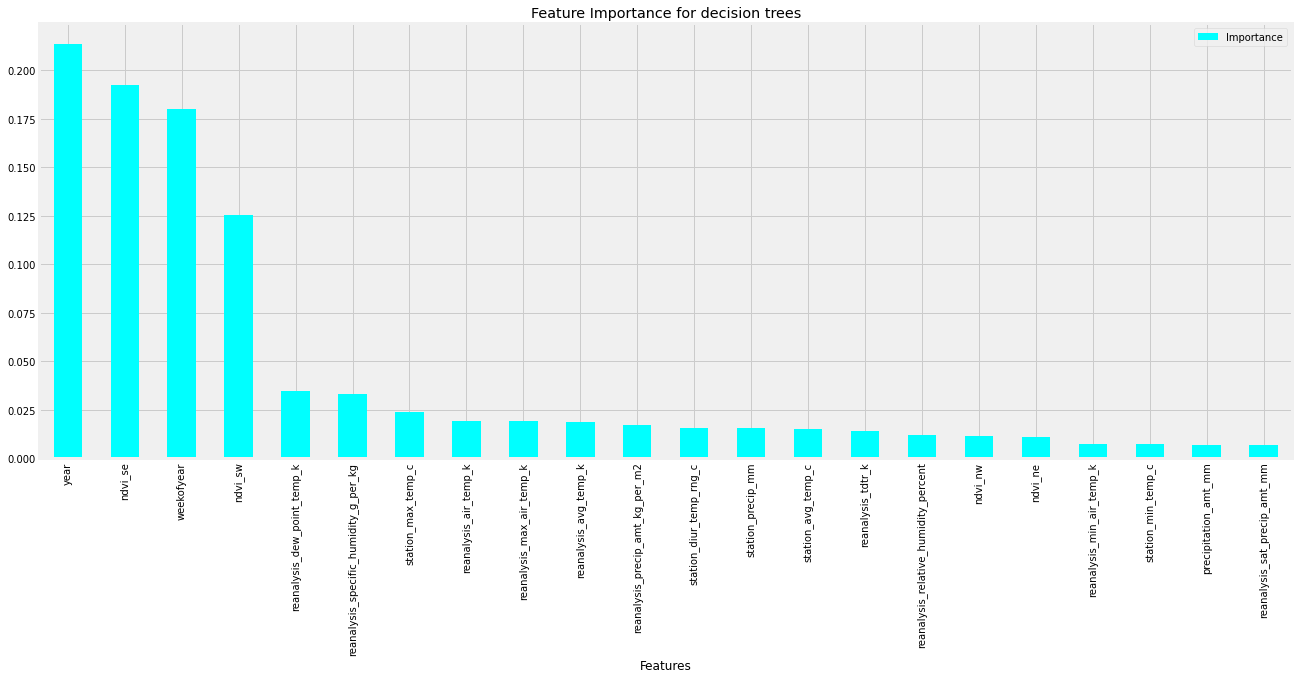

In [1329]:
# Getting the feature importance

pd.DataFrame({'Features' : X.columns, 'Importance' : model.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Feature Importance for decision trees',figsize = (20, 8), color = 'cyan')
plt.show()

In [1330]:
df33.columns

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

Selected Features:
year
weekofyear
ndvi_se
ndvi_sw
reanalysis_air_temp_k
reanalysis_avg_temp_k
reanalysis_dew_point_temp_k
reanalysis_max_air_temp_k
reanalysis_precip_amt_kg_per_m2
reanalysis_specific_humidity_g_per_kg
station_max_temp_c
station_precip_mm


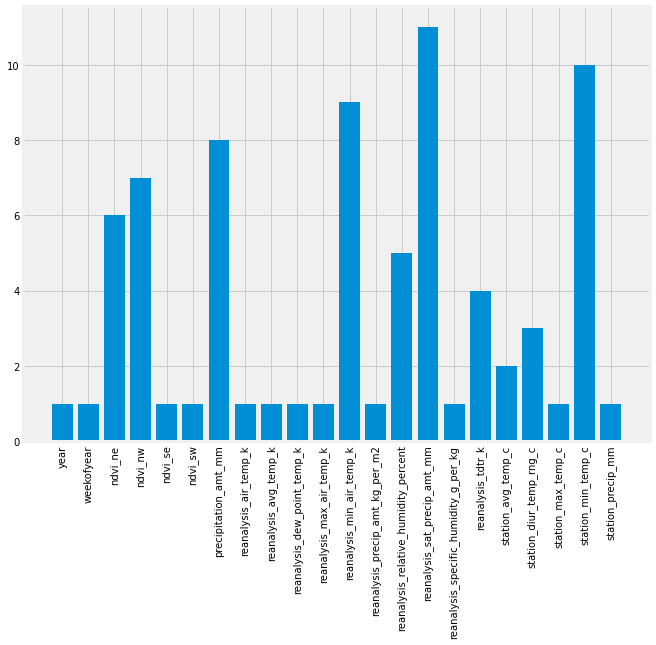

In [1331]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

f, ax = plt.subplots(figsize=(10,8)) 

# separate into input and output variables
array = df33.values
X = array[:,0:-1]
y = array[:,-1]
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=300, random_state=1), n_features_to_select=12)
fit = rfe.fit(X, y)
# report selected features
print('Selected Features:')
names = df33.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = df33.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
plt.xticks(rotation=90)
pyplot.show()

### Feature Selection for Iquitos Data.

In [1332]:
iq.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,ndvi_all_directions,ndvi_desc,nvdi_mean
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.4,10.775000,32.5,20.7,3.0,0,0.228307,shrub/grassland,0.222010
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.9,11.566667,34.0,20.8,55.6,0,0.256012,shrub/grassland,0.260797
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.8,11.466667,33.0,20.7,38.1,0,0.170504,rock/sand,0.184667


In [1333]:
fs_iq = iq.drop(['city','week_start_date','ndvi_desc','nvdi_mean','ndvi_all_directions'],1)
fs_iq.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,2000,26,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,2000,27,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,2000,28,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,2000,29,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,2000,30,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


[0.21347482 0.17997199 0.01108381 0.01137659 0.19215596 0.12521582
 0.00684776 0.0192649  0.01874758 0.03463178 0.01901415 0.007558
 0.01713633 0.0121008  0.00663571 0.03330953 0.01393309 0.01493989
 0.01562834 0.02407448 0.00728866 0.01561001]


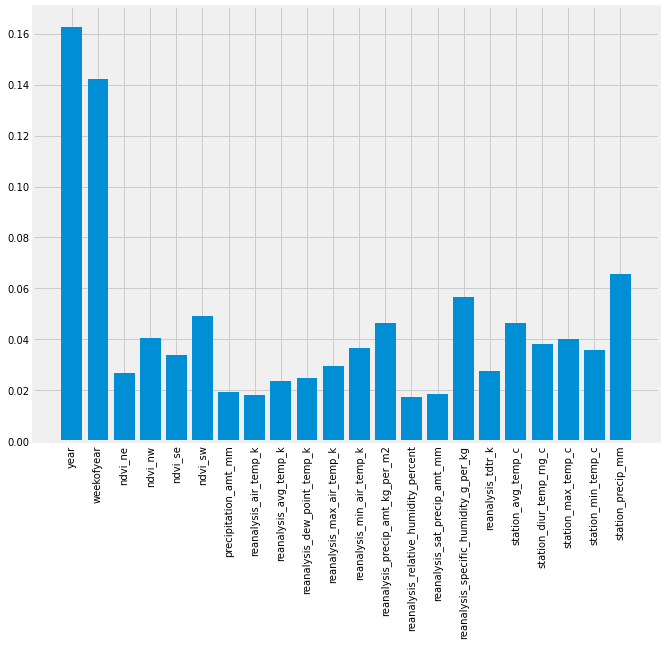

In [1334]:
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

f, ax = plt.subplots(figsize=(10,8)) # set the size that you'd like (width, height)

# load data
array = fs_iq.values
# split into input and output
X = fs_iq.drop('total_cases',1)
y = fs_iq['total_cases']
# fit random forest model
model_iq = RandomForestRegressor(n_estimators=500, random_state=1)
model_iq.fit(X, y)
# show importance scores
print(model.feature_importances_)
# plot importance scores
names = fs_iq.columns.values[0:-1]
scores = [i for i in range(len(names))]
pyplot.bar(scores, model_iq.feature_importances_)
pyplot.xticks(scores, names)
plt.xticks(rotation=90)
pyplot.show()

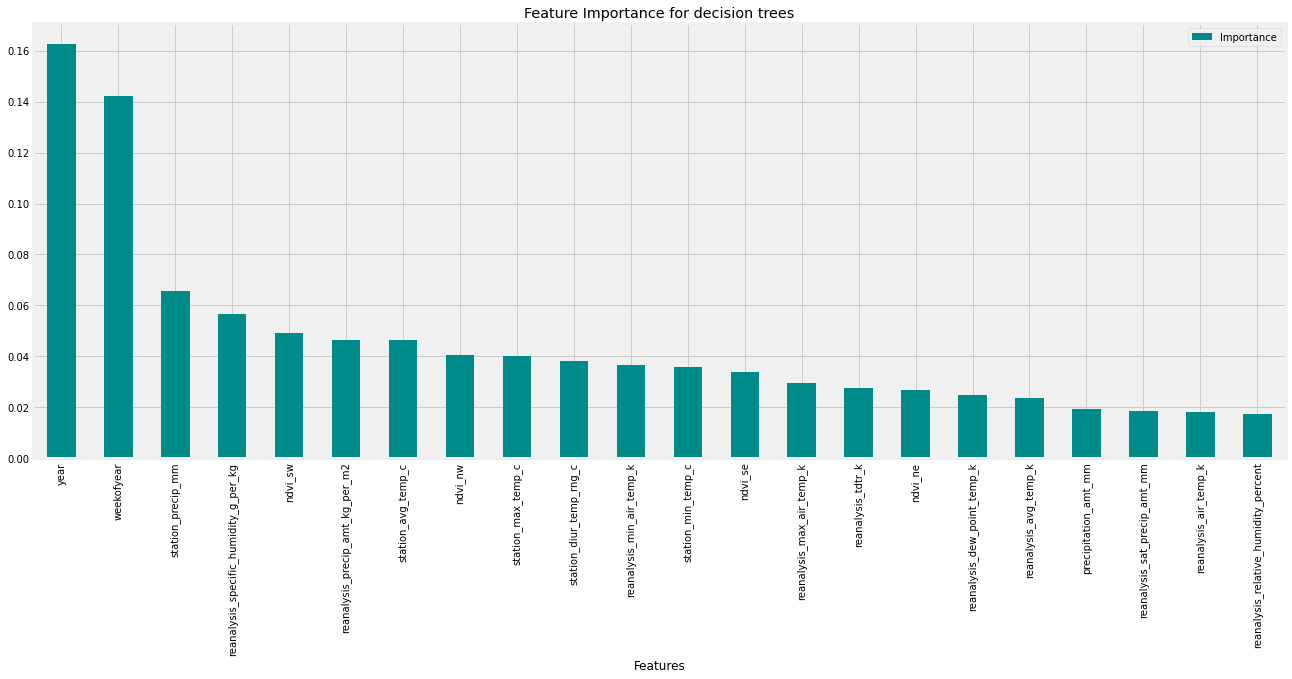

In [1335]:
# Getting the feature importance

pd.DataFrame({'Features' : X.columns, 'Importance' : model_iq.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Feature Importance for decision trees',figsize = (20, 8), color = 'darkcyan')
plt.show()

Selected Features:
year
weekofyear
ndvi_nw
ndvi_se
ndvi_sw
reanalysis_max_air_temp_k
reanalysis_min_air_temp_k
reanalysis_precip_amt_kg_per_m2
reanalysis_specific_humidity_g_per_kg
station_avg_temp_c
station_max_temp_c
station_precip_mm


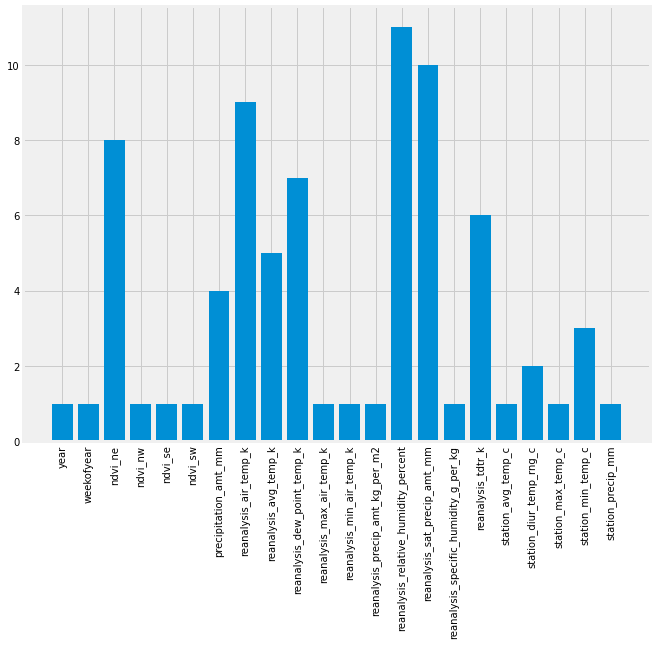

In [1336]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

f, ax = plt.subplots(figsize=(10,8)) 

# separate into input and output variables
array = fs_iq.values
X = array[:,0:-1]
y = array[:,-1]
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=300, random_state=1), n_features_to_select=12)
fit = rfe.fit(X, y)
# report selected features
print('Selected Features:')
names = fs_iq.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = fs_iq.columns.values[0:-1]
scores = [i for i in range(len(names))]
pyplot.bar(scores, fit.ranking_)
pyplot.xticks(scores, names)
plt.xticks(rotation=90)
pyplot.show()

Final Data.

In [1337]:
#San Juan

final_sj = sj[['year','weekofyear','ndvi_se','ndvi_sw','reanalysis_air_temp_k','reanalysis_avg_temp_k',
             'reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_precip_amt_kg_per_m2',
             'reanalysis_specific_humidity_g_per_kg','station_max_temp_c','station_precip_mm']]
final_sj.head()

,year,weekofyear,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,station_max_temp_c,station_precip_mm
0,1990,18,0.198483,0.177617,297.572857,297.742857,292.414286,299.8,32.00,14.012857,29.4,16.0
1,1990,19,0.162357,0.155486,298.211429,298.442857,293.951429,300.9,17.94,15.372857,31.7,8.6
2,1990,20,0.157200,0.170843,298.781429,298.878571,295.434286,300.5,26.10,16.848571,32.2,41.4
3,1990,21,0.227557,0.235886,298.987143,299.228571,295.310000,301.4,13.90,16.672857,33.3,4.0
4,1990,22,0.251200,0.247340,299.518571,299.664286,295.821429,301.9,12.20,17.210000,35.0,5.8


In [1338]:
final_iq = iq[['year','weekofyear','ndvi_nw','ndvi_se','ndvi_sw','reanalysis_max_air_temp_k',
               'reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2','reanalysis_specific_humidity_g_per_kg',
               'station_avg_temp_c','station_max_temp_c','station_precip_mm']]
final_iq.head()

,year,weekofyear,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_precip_mm
936,2000,26,0.132257,0.340886,0.247200,307.3,293.1,43.19,16.651429,26.400000,32.5,3.0
937,2000,27,0.276100,0.289457,0.241657,306.6,291.1,46.00,16.862857,26.900000,34.0,55.6
938,2000,28,0.173129,0.204114,0.128014,304.5,292.6,64.77,17.120000,26.800000,33.0,38.1
939,2000,29,0.145429,0.254200,0.200314,303.6,288.6,23.96,14.431429,25.766667,31.5,30.0
940,2000,30,0.322129,0.254371,0.361043,307.0,291.5,31.80,15.444286,26.600000,33.3,4.0
